# Problem2 – Practical Part 1

## Import Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load Dataset and Data Summary

In [3]:
# Load dataset
df = pd.read_csv(r"D:\OneDrive - PUPR\Documents\KULIAH\MATH5836\practice\Dry_Bean_Dataset.csv", sep = ";")


In [4]:
#Check the 5-first data
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,2.081.781.167,173.888.747,1.197.191.424,0.549812187,28715,1.901.410.973,0.763923,0.988856,0.958027126,0.913358,0.007332,0.003147,0.834222,0.998723889,SEKER
1,28734,638.018,2.005.247.957,1.827.344.194,1.097.356.461,0.411785251,29172,1.912.727.505,0.783968,0.984986,0.887033637,0.953861,0.006979,0.003564,0.909851,0.998430331,SEKER
2,29380,624.11,2.128.261.299,1.759.311.426,1.209.712.656,0.562727317,29690,1.934.109.041,0.778113,0.989559,0.947849473,0.908774,0.007244,0.003048,0.825871,0.999066137,SEKER
3,30008,645.884,210.557.999,1.825.165.157,1.153.638.059,0.498615976,30724,1.954.670.618,0.782681,0.976696,0.903936374,0.928329,0.007017,0.003215,0.861794,0.994198849,SEKER
4,30140,620.134,2.018.478.822,1.902.792.788,106.079.802,0.333679658,30417,195.896.503,0.773098,0.990893,0.984877069,0.970516,0.006697,0.003665,0.941900,0.999166059,SEKER


## Data Preprocessing

In [5]:
# Clean numeric columns with dot-separated numbers
for col in df.columns:
    if col != 'Class':
        try:
            df[col] = df[col].astype(str).str.replace('.', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            continue

In [6]:
#Check missing values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
#Check unique class for the y
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON',
       'unknown'], dtype=object)

we have unknown value in class so we should drop them

In [8]:
#Drop unknown data from Class
df['Class'] = df['Class'].replace('unknown', pd.NA)

In [9]:
#check the missing value before dropping NA data
df.isnull().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
EquivDiameter       0
Extent              0
Solidity            0
roundness           0
Compactness         0
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
Class              74
dtype: int64

In [10]:
#Remove missing value
df= df.dropna()

In [11]:
#check the missing value after dropping NA data
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [12]:
#total data after dropping missing value
len(df)

14217

In [13]:
# Encode class labels
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [14]:
#check the types on Class Variable sequentially
le.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [15]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291,2081781167,173888747,1197191424,549812187,28715,1901410973,763922518,988855999,958027126,913357755,7331506,3147289.0,834222388,998723889,5
1,28734,638018,2005247957,1827344194,1097356461,411785251,29172,1912727505,783968133,984985603,887033637,953860842,6978659,3563624.0,909850506,998430331,5
2,29380,62411,2128261299,1759311426,1209712656,562727317,29690,1934109041,778113248,989558774,947849473,908774239,7243912,3047733.0,825870617,999066137,5
3,30008,645884,210557999,1825165157,1153638059,498615976,30724,1954670618,782681273,976695743,903936374,928328835,7016729,3214562.0,861794425,994198849,5
4,30140,620134,2018478822,1902792788,106079802,333679658,30417,195896503,773098035,99089325,984877069,970515523,669701,3664972.0,941900381,999166059,5


In [16]:
# Split into features and target
X = df.drop(columns='Class')
y = df['Class']

In [17]:
#standardize the features
scaler= StandardScaler()
X_scaled_array = scaler.fit_transform(X)             # This is a NumPy array
X_scaled_df = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)  # Convert back to DataFrame

In [18]:
X = X_scaled_df

In [19]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.180659,-0.181718,-0.695164,-2.330958,-0.508679,-0.604021,-0.182747,-0.450304,0.393429,0.342977,0.670707,0.825387,0.651419,2.154479,1.251300,0.346291
1,-0.180658,-0.181697,-0.759128,0.000460,-0.714006,-1.226752,-0.182746,-0.437553,0.488726,0.328718,0.378773,1.005183,0.481697,2.717120,1.629395,0.345207
2,-0.180658,-0.182139,-0.656317,-0.095468,-0.482927,-0.545752,-0.182746,-0.413461,0.460892,0.345566,0.628855,0.805040,0.609286,2.019937,1.209546,0.347553
3,-0.180657,-0.181691,-2.259087,-0.002613,-0.598253,-0.835001,-0.182745,-0.390293,0.482608,0.298179,0.448279,0.891845,0.500009,2.245392,1.389143,0.329593
4,-0.180657,-0.181711,-0.748070,0.106844,-2.752726,-1.579138,-0.182745,-2.372023,0.437049,-2.934834,0.781117,1.079114,-2.552972,2.854084,1.789625,0.347922


In [20]:
#check the shape of X
X.shape

(14217, 16)

### Missing values and its treatment

Text(0.5, 1.0, 'Boxplot of all features')

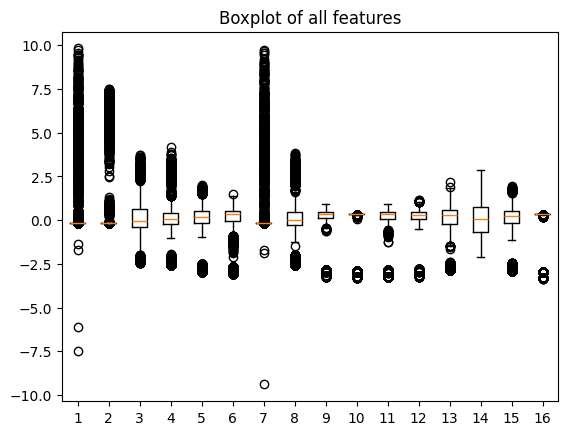

In [21]:

plt.boxplot(X)
plt.title('Boxplot of all features')

In [22]:
# treatment for outliers data using IQR/cap Method

for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # IQR-based winsorization using clip
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)


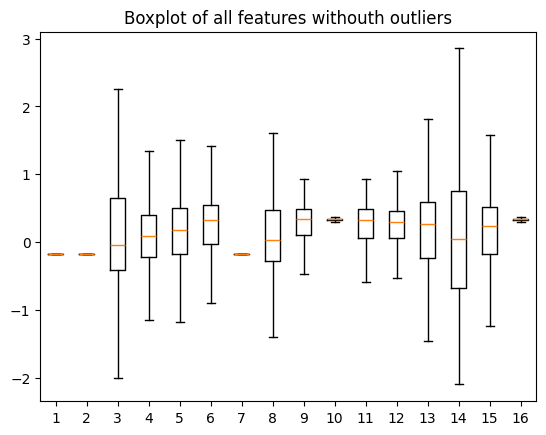

In [23]:
#ploting boxplot after cap the outliers
plt.boxplot(X)
plt.title("Boxplot of all features withouth outliers")
plt.show()

### Correlation 

<Figure size 1200x1600 with 0 Axes>

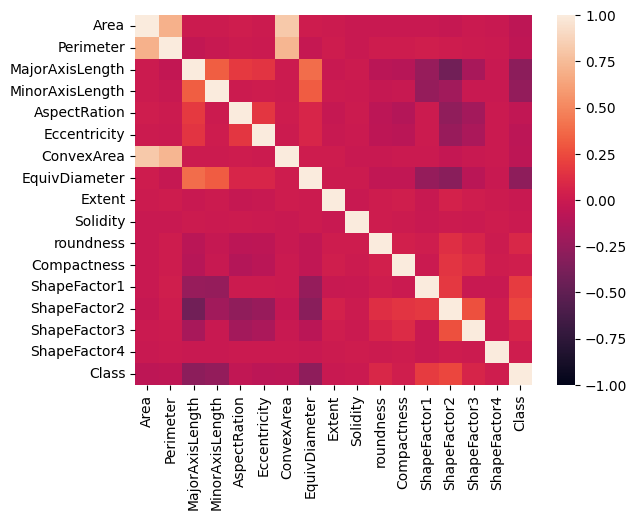

<Figure size 1200x1600 with 0 Axes>

In [24]:
#Correlation Matrix
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, vmin=-1, vmax=1)
plt.figure(figsize=(12,16))

In [25]:
corr['Class'].sort_values(ascending = False)

Class              1.000000
ShapeFactor2       0.229782
ShapeFactor1       0.179688
roundness          0.081446
ShapeFactor3       0.066639
Compactness        0.028319
ShapeFactor4       0.016619
Solidity          -0.002640
Extent            -0.014263
AspectRation      -0.050896
Perimeter         -0.056481
ConvexArea        -0.066201
Area              -0.068223
Eccentricity      -0.074888
MinorAxisLength   -0.260388
EquivDiameter     -0.281455
MajorAxisLength   -0.290360
Name: Class, dtype: float64

### Outcome Proportionality

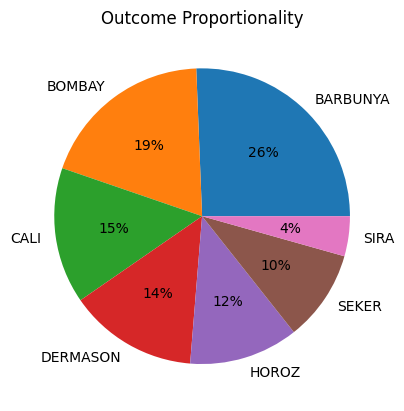

In [26]:
plt.pie(df.Class.value_counts(), 
        labels=le.classes_, 
        autopct='%.f%%', shadow=False)
plt.title('Outcome Proportionality')
plt.show()


## Data Modelling and Evaluation

In [27]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
from sklearn.model_selection import cross_val_score

# Fit default KNN (k = 6)
knn_default = KNeighborsClassifier(n_neighbors=6)
knn_default.fit(X_train, y_train)

# Predict on test set
y_pred_default = knn_default.predict(X_test)

# Evaluate on test set
print("Default KNN (k=6) Accuracy on test set:", accuracy_score(y_test, y_pred_default))
print("Classification Report (k=6):\n", classification_report(y_test, y_pred_default, target_names=le.classes_))

# Cross-validation on training data
cv_scores = cross_val_score(knn_default, X_train, y_train, cv=5)  # 5-fold CV
print("Cross-validation scores (k=6):", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Default KNN (k=6) Accuracy on test set: 0.8326300984528833
Classification Report (k=6):
               precision    recall  f1-score   support

    BARBUNYA       0.79      0.67      0.73       284
      BOMBAY       0.95      0.82      0.88       124
        CALI       0.78      0.81      0.79       340
    DERMASON       0.82      0.89      0.86       729
       HOROZ       0.88      0.93      0.90       400
       SEKER       0.89      0.88      0.89       424
        SIRA       0.79      0.75      0.77       543

    accuracy                           0.83      2844
   macro avg       0.84      0.82      0.83      2844
weighted avg       0.83      0.83      0.83      2844

Cross-validation scores (k=6): [0.81494505 0.8232967  0.83912088 0.81926121 0.82585752]
Mean cross-validation accuracy: 0.8244962741743744


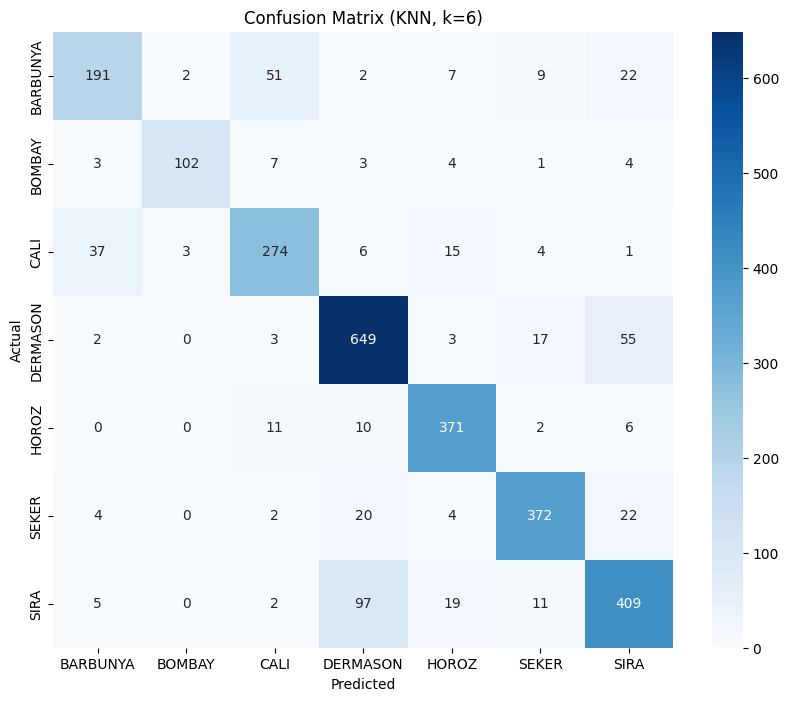

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_default)

# Class labels from LabelEncoder
class_labels = le.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN, k=6)')
plt.show()


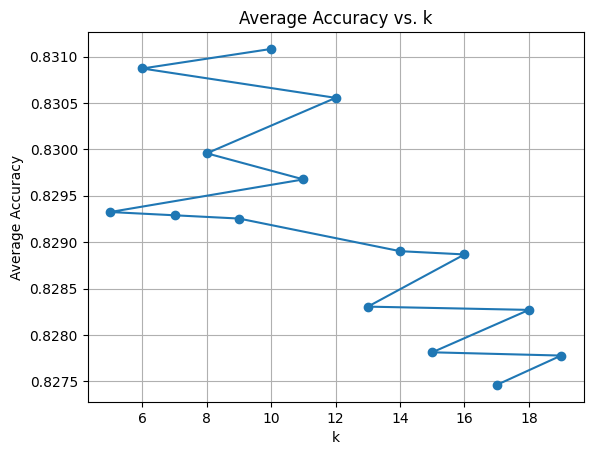


 Best k across 10 experiments is 10 with average accuracy = 0.8311


In [30]:
from collections import defaultdict

k_values = list(range(5, 20))
n = 10

# Dictionary to collect accuracies for each k
k_accuracy = defaultdict(list)

for exp in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=exp)
    
    for k in k_values:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        k_accuracy[k].append(acc)

# Compute average accuracy per k
avg_accuracy = {k: sum(acc_list)/len(acc_list) for k, acc_list in k_accuracy.items()}

# Find best k
best_k = max(avg_accuracy, key=avg_accuracy.get)

# Convert to DataFrame for display
df_avg = pd.DataFrame(list(avg_accuracy.items()), columns=["k", "Avg Accuracy"]).sort_values(by="Avg Accuracy", ascending=False)

import matplotlib.pyplot as plt
plt.plot(df_avg["k"], df_avg["Avg Accuracy"], marker='o')
plt.title("Average Accuracy vs. k")
plt.xlabel("k")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.show()

print(f"\n Best k across {n} experiments is {best_k} with average accuracy = {avg_accuracy[best_k]:.4f}")


In [31]:
from sklearn.model_selection import cross_val_score

# Fit alternate KNN (k = 10)
knn_default = KNeighborsClassifier(n_neighbors=10)
knn_default.fit(X_train, y_train)

# Predict on test set
y_pred_default = knn_default.predict(X_test)

# Evaluate on test set
print("Default KNN (k=10) Accuracy on test set:", accuracy_score(y_test, y_pred_default))
print("Classification Report (k=10):\n", classification_report(y_test, y_pred_default, target_names=le.classes_))

# Cross-validation on training data
cv_scores = cross_val_score(knn_default, X_train, y_train, cv=5)  # 5-fold CV
print("Cross-validation scores (k=10):", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Default KNN (k=10) Accuracy on test set: 0.8291139240506329
Classification Report (k=10):
               precision    recall  f1-score   support

    BARBUNYA       0.77      0.64      0.70       259
      BOMBAY       0.97      0.83      0.89       112
        CALI       0.78      0.81      0.79       341
    DERMASON       0.83      0.88      0.86       742
       HOROZ       0.89      0.89      0.89       417
       SEKER       0.88      0.86      0.87       410
        SIRA       0.77      0.79      0.78       563

    accuracy                           0.83      2844
   macro avg       0.84      0.81      0.83      2844
weighted avg       0.83      0.83      0.83      2844

Cross-validation scores (k=10): [0.8189011  0.82945055 0.81802198 0.83992964 0.8289358 ]
Mean cross-validation accuracy: 0.8270478123459654


Conclusion: KNN with k=10 is better for modelling the data for the classification

### Check overfitting

In [32]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

# Predict
y_pred_ts = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

# Accuracy
acc_ts = accuracy_score(y_test, y_pred_ts)
acc_tr = accuracy_score(y_train, y_pred_tr)

# Output
print(f"Accuracy for Train: {acc_tr:.4f}")
print(f"Accuracy for Test: {acc_ts:.4f}")


Accuracy for Train: 0.8548
Accuracy for Test: 0.8291


## Conclussion: 
* KNN with k=10 is the better model. 
* There's no overfitting because the train and test accuracy is very close